<a href="https://colab.research.google.com/github/MJ199999/Car-Detecting/blob/main/CarDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# 임포트

In [ ]:
import cv2
import matplotlib.pyplot as plt
import glob

# Darknet 다운받아서 컴파일

In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git

fatal: destination path 'darknet' already exists and is not an empty directory.


In [ ]:
%cd darknet

/content/darknet


In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1' Makefile
!sed -i 's/LIBSO=0/LIBSO=1' Makefile


In [ ]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (iteration_old == 0)
      |             ^~
./src/

# 데이터 준비
- darknet/data/obj에 압축 풀기
- classes.names와 training.data 파일 생성
- training.txt 파일 생성

In [ ]:
!cp /gdrive/MyDrive/Cars.zip ./

In [ ]:
!rm -rf data/obj
!mkdir data/obj
!zip -FF Cars --out Cars_ver2.zip
!unzip Cars_ver2.zip -d data/obj

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: data/obj/train/syn_04630.png  
  inflating: data/obj/train/syn_04630.txt  
  inflating: data/obj/train/syn_04631.png  
  inflating: data/obj/train/syn_04631.txt  
  inflating: data/obj/train/syn_04632.png  
  inflating: data/obj/train/syn_04632.txt  
  inflating: data/obj/train/syn_04633.png  
  inflating: data/obj/train/syn_04633.txt  
  inflating: data/obj/train/syn_04634.png  
  inflating: data/obj/train/syn_04634.txt  
  inflating: data/obj/train/syn_04635.png  
  inflating: data/obj/train/syn_04635.txt  
  inflating: data/obj/train/syn_04636.png  
  inflating: data/obj/train/syn_04636.txt  
  inflating: data/obj/train/syn_04637.png  
  inflating: data/obj/train/syn_04637.txt  
  inflating: data/obj/train/syn_04638.png  
  inflating: data/obj/train/syn_04638.txt  
  inflating: data/obj/train/syn_04639.png  
  inflating: data/obj/train/syn_04639.txt  
  inflating: data/obj/train/syn_04640.png  
  inflating: data/obj/train/syn_04640.tx

### 학습 위한 설정 파일 생성

#### data/obj.names

In [ ]:
%%writefile data/obj.names
chevrolet_malibu_sedan_2012_2016
chevrolet_malibu_sedan_2017_2019
chevrolet_spark_hatchback_2016_2021
chevrolet_trailblazer_suv_2021_
chevrolet_trax_suv_2017_2019
genesis_g80_sedan_2016_2020
genesis_g80_sedan_2021_
genesis_gv80_suv_2020_
hyundai_avante_sedan_2011_2015
hyundai_avante_sedan_2020_
hyundai_grandeur_sedan_2011_2016
hyundai_grandstarex_van_2018_2020
hyundai_ioniq_hatchback_2016_2019
hyundai_sonata_sedan_2004_2009
hyundai_sonata_sedan_2010_2014
hyundai_sonata_sedan_2019_2020
kia_carnival_van_2015_2020
kia_carnival_van_2021_
kia_k5_sedan_2010_2015
kia_k5_sedan_2020_
kia_k7_sedan_2016_2020
kia_mohave_suv_2020_
kia_morning_hatchback_2004_2010
kia_morning_hatchback_2011_2016
kia_ray_hatchback_2012_2017
kia_sorrento_suv_2015_2019
kia_sorrento_suv_2020_
kia_soul_suv_2014_2018
kia_sportage_suv_2016_2020
kia_stonic_suv_2017_2019
renault_sm3_sedan_2015_2018
renault_xm3_suv_2020_
ssangyong_korando_suv_2019_2020
ssangyong_tivoli_suv_2016_2020

Overwriting data/obj.names


In [ ]:
!cat data/obj.names

000,chevrolet_malibu_sedan_2012_2016
001,chevrolet_malibu_sedan_2017_2019
002,chevrolet_spark_hatchback_2016_2021
003,chevrolet_trailblazer_suv_2021_
004,chevrolet_trax_suv_2017_2019
005,genesis_g80_sedan_2016_2020
006,genesis_g80_sedan_2021_
007,genesis_gv80_suv_2020_
008,hyundai_avante_sedan_2011_2015
009,hyundai_avante_sedan_2020_
010,hyundai_grandeur_sedan_2011_2016
011,hyundai_grandstarex_van_2018_2020
012,hyundai_ioniq_hatchback_2016_2019
013,hyundai_sonata_sedan_2004_2009
014,hyundai_sonata_sedan_2010_2014
015,hyundai_sonata_sedan_2019_2020
016,kia_carnival_van_2015_2020
017,kia_carnival_van_2021_
018,kia_k5_sedan_2010_2015
019,kia_k5_sedan_2020_
020,kia_k7_sedan_2016_2020
021,kia_mohave_suv_2020_
022,kia_morning_hatchback_2004_2010
023,kia_morning_hatchback_2011_2016
024,kia_ray_hatchback_2012_2017
025,kia_sorrento_suv_2015_2019
026,kia_sorrento_suv_2020_
027,kia_soul_suv_2014_2018
028,kia_sportage_suv_2016_2020
029,kia_stonic_suv_2017_2019
030,renault_sm3_sedan_2015_2018
031,r

In [ ]:
!cp data/obj.names data/coco.names


### data/obj.data

In [ ]:
%%writefile data/obj.data
classes = 34
train = data/train.txt
valid = data/valid.txt
names = /content/darknet/data/obj.names
backup = ./

Overwriting data/obj.data


In [ ]:
!cat data/obj.data

classes = 34
train = data/train.txt
valid = data/valid.txt
names = /content/darknet/data/obj.names
backup = ./


### data/train.txt

In [ ]:
!ls -al data/obj/train

total 14984756
drwxr-xr-x 2 root root  425984 Jun  3 03:47 .
drwxr-xr-x 5 root root    4096 Jun  3 03:47 ..
-rw-r--r-- 1 root root 2491548 May 16 00:28 syn_00649.png
-rw-r--r-- 1 root root     115 May 16 00:28 syn_00649.txt
-rw-r--r-- 1 root root 2538176 May 16 00:28 syn_00650.png
-rw-r--r-- 1 root root     113 May 16 00:28 syn_00650.txt
-rw-r--r-- 1 root root 3188394 May 16 00:28 syn_00651.png
-rw-r--r-- 1 root root      37 May 16 00:28 syn_00651.txt
-rw-r--r-- 1 root root 2294529 May 16 00:28 syn_00652.png
-rw-r--r-- 1 root root     110 May 16 00:28 syn_00652.txt
-rw-r--r-- 1 root root 3190496 May 16 00:28 syn_00653.png
-rw-r--r-- 1 root root     116 May 16 00:28 syn_00653.txt
-rw-r--r-- 1 root root 2286232 May 16 00:28 syn_00654.png
-rw-r--r-- 1 root root     116 May 16 00:28 syn_00654.txt
-rw-r--r-- 1 root root 2230548 May 16 00:28 syn_00655.png
-rw-r--r-- 1 root root     116 May 16 00:28 syn_00655.txt
-rw-r--r-- 1 root root 2743482 May 16 00:28 syn_00656.png
-rw-r--r-- 1 root root

In [ ]:
# ls -al data/obj/Raccoon 밑에 jpg 파일들이 있으면
# images_list = glob.glob("data/obj/laptops_labeled/*[jpg|png|jpeg]")
images_list_1 = glob.glob("data/obj/train/*[jpg|png|jpeg]")
images_list_2 = glob.glob("data/obj/valid/*[jpg|png|jpeg]")

# ls -al data/obj 밑에 jpg 파일들이 있으면
# images_list = glob.glob("data/obj/*[jpg|png|jpeg]")

print(images_list_1)
print(images_list_2)

# Create train.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list_1)) 
file.close() 

file = open("data/valid.txt", "w") 
file.write("\n".join(images_list_2)) 
file.close() 

['data/obj/train']


In [ ]:
!cat cfg/yolov3_custom.cfg

[net]
# Testing
batch=64
subdivisions=16
# Training
# batch=64
# subdivisions=166
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = $max_batches
policy=steps
steps=$steps1,$steps2
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

# Downsample

[convolutional]
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

[c

# 4. 사전 학습된 YOLOv3 모델 파일 다운로드

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2023-06-03 04:53:52--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.4’

darknet53.conv.74.4 100%[===================>] 154.96M  22.9MB/s    in 7.5s    

2023-06-03 04:54:00 (20.7 MB/s) - ‘darknet53.conv.74.4’ saved [162482580/162482580]



# 5. 학습관련 설정 파일 수정

원 설정파일 yolov3.cfg를 yolv3_custom.cfg로 복사하고

복사한 설정파일을 수정

In [ ]:
# 탐지 대상 클래스 수를 설정
CLASS_NUM = 34

In [ ]:
!cp cfg/yolov3.cfg cfg/yolov3_custom.cfg

classes = CLASS_NUM
filters = (classes + 5) * 3
# max_batches = classes * 2000
max_batches = classes * 1000
steps1 = int(max_batches*0.8)
steps2 = int(max_batches*0.9)
# if max_batches < 6000:
#   max_batches = 6000

# Edit classes & filters
!sed -i 's/batch=1/batch=64/' cfg/yolov3_custom.cfg
!sed -i 's/subdivisions=1/subdivisions=32/' cfg/yolov3_custom.cfg
!sed -i 's/max_batches = 500200/max_batches = $max_batches/' cfg/yolov3_custom.cfg
!sed -i '610 s@classes=80@classes=$classes@' cfg/yolov3_custom.cfg
!sed -i '696 s@classes=80@classes=$classes@' cfg/yolov3_custom.cfg
!sed -i '783 s@classes=80@classes=$classes@' cfg/yolov3_custom.cfg
!sed -i '603 s@filters=255@filters=$filters@' cfg/yolov3_custom.cfg
!sed -i '689 s@filters=255@filters=$filters@' cfg/yolov3_custom.cfg
!sed -i '776 s@filters=255@filters=$filters@' cfg/yolov3_custom.cfg
!sed -i 's/steps=400000,450000/steps=$steps1,$steps2/' cfg/yolov3_custom.cfg

# 6. 학습 실행

학습된 모델은  ./yolov3_custom_last.weights 로 저장된다.

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, GPU count: 1  
 OpenCV version: 4.2.0
yolov3_custom
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 B

In [ ]:
!cp ./yolov3_custom_last.weights /gdrive/MyDrive/

cp: cannot stat './yolov3_custom_last.weights': No such file or directory


## 7. 탐지 실행

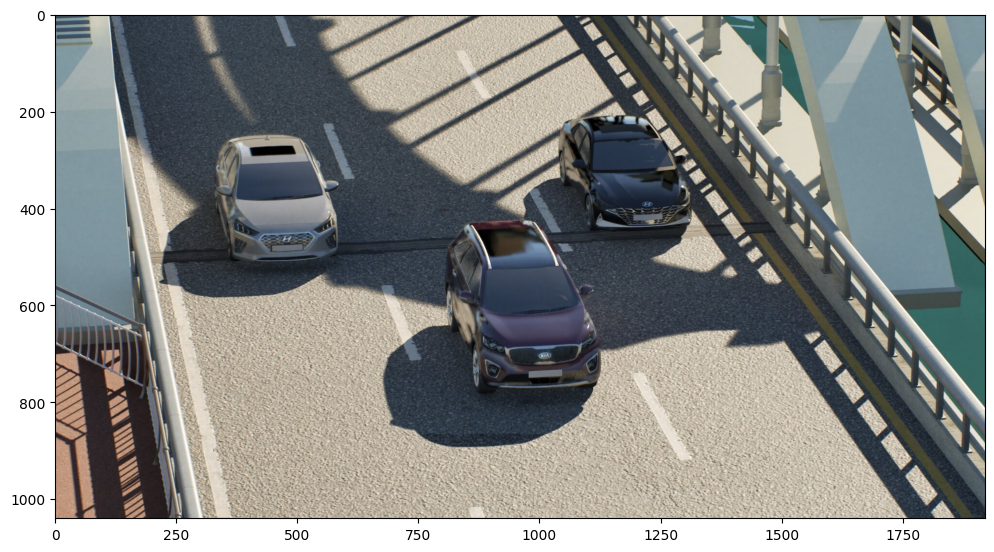

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

INPUT_SIZE = 608

image_path = "/content/syn_00000.png"
image      = cv2.imread(image_path)
image      = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,10))
plt.imshow(image)
plt.show()

In [ ]:
bboxes = model.predict(image)
print(len(bboxes))
for bbox in bboxes:
    print(bbox)

In [ ]:
!./darknet detect cfg/yolov3_custom.cfg ./yolov3_custom_last.weights data/obj/valid/syn_00000.png

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcu

In [ ]:
pred = plt.imread('predictions.png')
plt.figure(figsize=(10,10))
plt.imshow(pred)
plt.show()

FileNotFoundError: ignored